In [ ]:
!nvidia-smi

Fri Mar 15 04:52:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WZ6CzSm7xPcc2BDIMun3")
project = rf.workspace("brindha").project("computer_vision-tz1x3")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to computer_vision-3 in yolov8:: 100%|██████████| 76/76 [00:00<00:00, 6024.70it/s]


In [15]:
#%cd {HOME}

#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

#import os

# Ensure that HOME and dataset.location are properly defined or replaced with their values
HOME = os.path.expanduser("~")
dataset_location = "https://app.roboflow.com/brindha/computer_vision-tz1x3/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true"

# Change the current directory to HOME
%cd {HOME}

# Execute the YOLO command
!yolo task=detect mode=train model=yolov8s.pt data={dataset_location}/data.yaml epochs=25 imgsz=800 plots=True


/root
New https://pypi.org/project/ultralytics/8.1.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=https://app.roboflow.com/brindha/computer_vision-tz1x3/browse?queryText=, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/root


FileNotFoundError: [Errno 2] No such file or directory: '/root/runs/detect/train/confusion_matrix.png'

/content


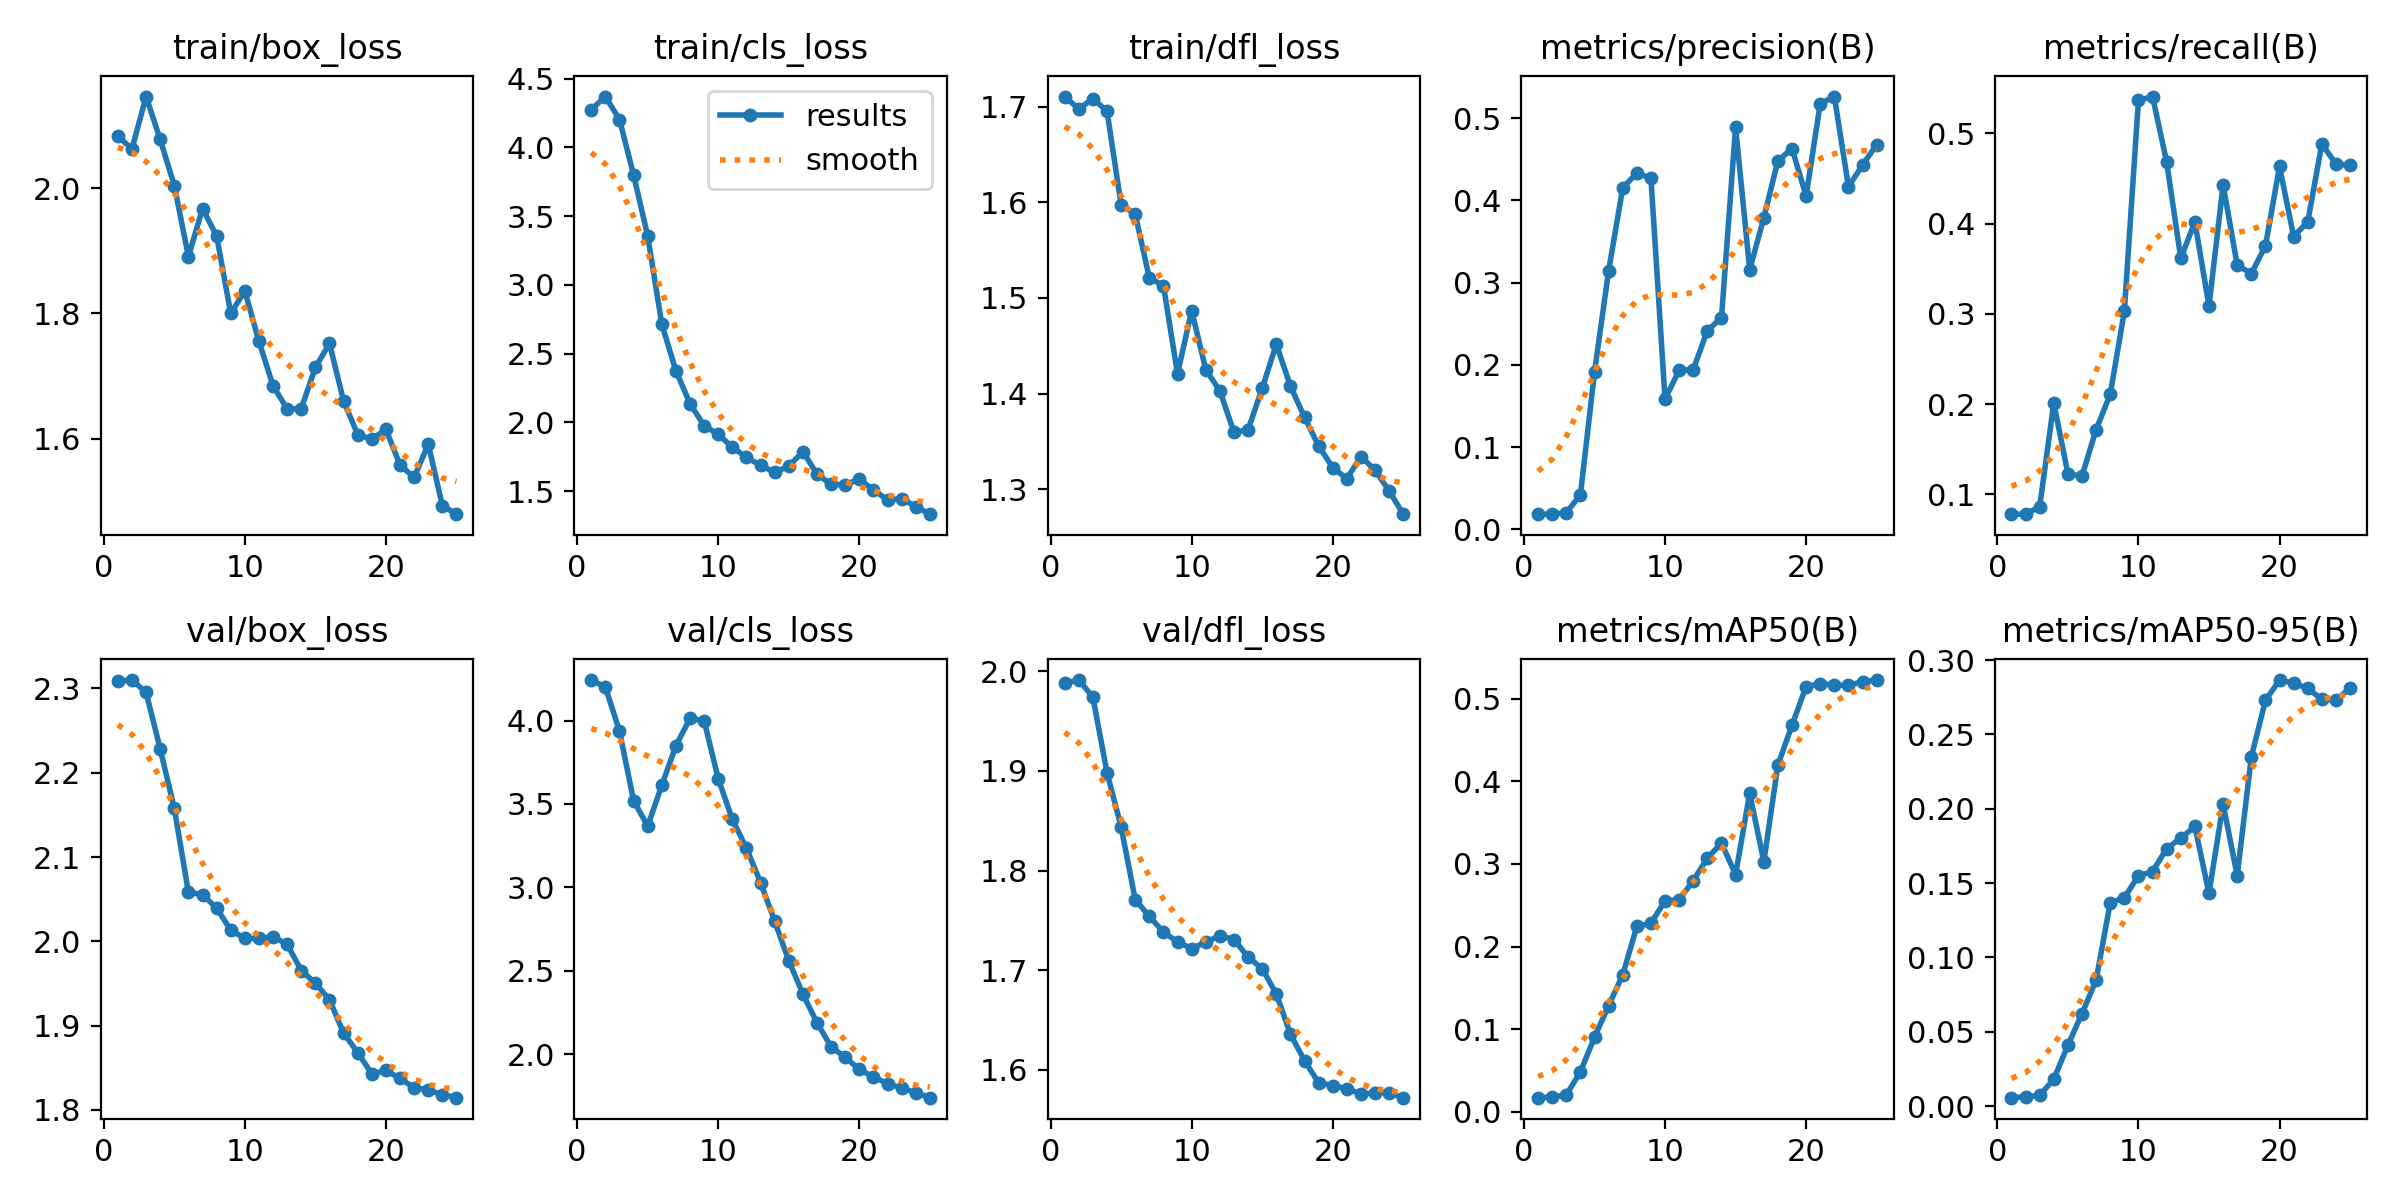

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


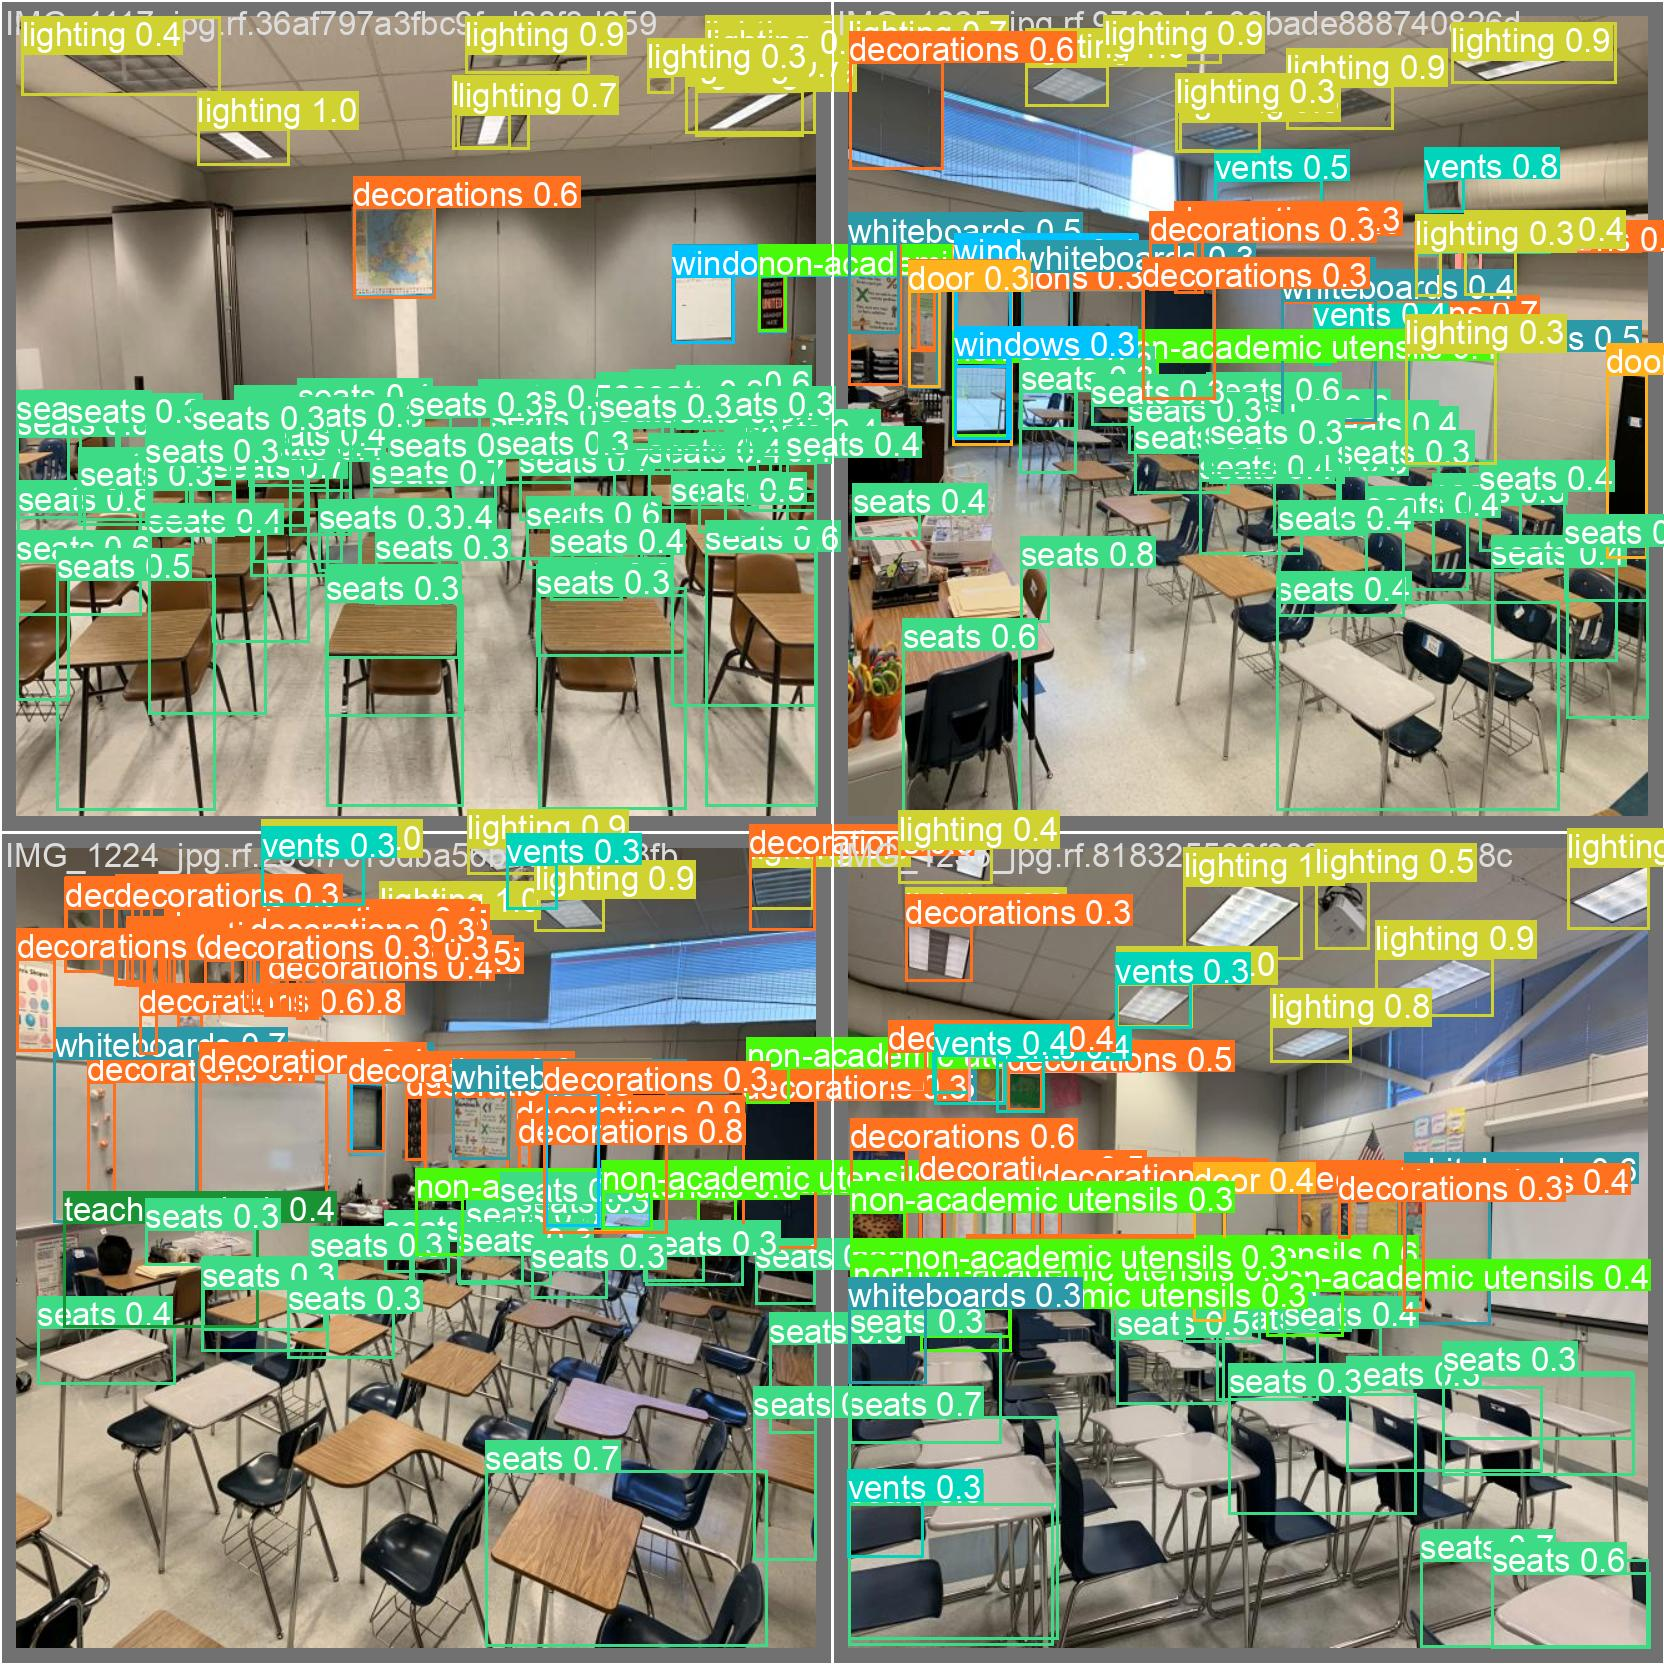

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/computer_vision-3/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.700s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.02it/s]
                   all          4        195      0.402      0.349      0.351      0.177
                 clock          4          2      0.469          1      0.995       0.58
           decorations          4         42      0.378      0.333      0.377      0.207
                  door          4          2      0.318        0.5      0.262      0.131
              lighting          4         18       0.47     

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/2 /content/computer_vision-3/test/images/IMG_1116_jpg.rf.bf46822444e8fd03834f121c97ae2121.jpg: 800x800 1 clock, 10 decorationss, 6 doors, 15 lightings, 1 non-academic utensils, 54 seatss, 2 teacher-s desks, 2 whiteboardss, 5 windowss, 22.5ms
image 2/2 /content/computer_vision-3/test/images/IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg: 800x800 18 decorationss, 3 lightings, 1 non-academic utensils, 16 seatss, 2 teacher-s desks, 3 whiteboardss, 2 windowss, 22.6ms
Speed: 6.8ms preprocess, 22.6ms inference, 278.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#import glob
#from IPython.display import Image, display

#for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
 #     display(Image(filename=image_path, width=600))
 #     print("\n")

NameError: name 'HOME' is not defined

In [ ]:
import glob
import os
from IPython.display import Image, display

home_dir = os.path.expanduser("~")
image_dir = os.path.join(home_dir, 'runs', 'detect', 'predict3')
for image_path in glob.glob(os.path.join(image_dir, '*.jpg'))[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")